# Lab 07-2 linear regression(without min/max)

* linear regression에 대한 설명 (Data에 대한 표준화나 정규화 없이 수행)

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

print(tf.__version__)

1.12.0


### 강의에 설명할 Data입니다
* X Data(feature)의 값은 해당 배열의 첫번째 값부터 4번째 값까지로 정의 되고 Y Data(label)는 해당 배열의 마지막 값을 정의(5번째 값)

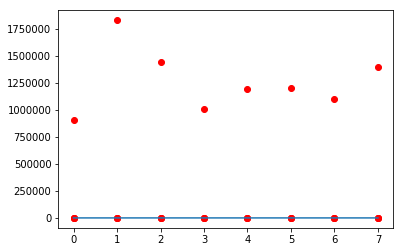

In [2]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()


##  Tensorflow Session
### 위 Data를 기준으로 Linear Regression 모델을 만들도록 하겠습니다
* Tensorflow data API를 통해 학습시킬 값들을 담는다 (Batch Size는 한번에 학습시킬 Size로 정한다)
* X(features),Y(labels)는 실재 학습에 쓰일 Data (연산을 위해 Type를 맞춰준다)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train)).repeat()

iter = dataset.make_initializable_iterator()
features, labels = iter.get_next()

features = tf.cast(features, tf.float32)
labels = tf.cast(labels, tf.float32)

* W와 b은 학습을 통해 생성되는 모델에 쓰이는 Wegith와 Bias (초기값을 variable : 0이나 Random값으로 가능 tf.random_normal([3, 3],tf.zeros([3,3]) )

In [4]:
W = tf.Variable(tf.random_normal([4, 1]))
b = tf.Variable(tf.random_normal([1]))

* Linear Regression의 Hyphthesis를 정의한다 

In [5]:
hypothesis = tf.matmul(features, W) + b

* 가설을 검증할 Cost 함수를 정의합니다(Mean Square Error를 사용)

In [6]:
cost = tf.reduce_mean(tf.square(hypothesis - labels))

* GradientDescentOptimizer로 학습 실행

In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

### Tensorflow를 통한 실행을 위해 Session을 실행합니다.

In [8]:
EPOCHS = 101

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(EPOCHS):
        sess.run(iter.initializer)
        _, loss_value, hypo_value = sess.run([train, cost, hypothesis])
        print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))  

Iter: 0, Loss: 10469654.0000, Prediction: [[-2025.9463]
 [-3036.1917]
 [-2600.907 ]
 [-2121.0547]
 [-2323.4526]
 [-2335.566 ]
 [-2215.1558]
 [-2548.01  ]]
Iter: 1, Loss: 11337537342327954079744.0000, Prediction: [[7.5108778e+10]
 [1.5120166e+11]
 [1.1894489e+11]
 [8.3379732e+10]
 [9.8267472e+10]
 [9.9094569e+10]
 [9.0823606e+10]
 [1.1563650e+11]]
Iter: 2, Loss: 12456329037179253078450471170721447936.0000, Prediction: [[-2.4895813e+18]
 [-5.0117829e+18]
 [-3.9425887e+18]
 [-2.7637335e+18]
 [-3.2572078e+18]
 [-3.2846230e+18]
 [-3.0104708e+18]
 [-3.8329278e+18]]
Iter: 3, Loss: inf, Prediction: [[8.2520532e+25]
 [1.6612232e+26]
 [1.3068243e+26]
 [9.1607684e+25]
 [1.0796455e+26]
 [1.0887326e+26]
 [9.9786122e+25]
 [1.2704757e+26]]
Iter: 4, Loss: inf, Prediction: [[-2.7352545e+33]
 [-5.5063480e+33]
 [-4.3316454e+33]
 [-3.0364605e+33]
 [-3.5786309e+33]
 [-3.6087515e+33]
 [-3.3075458e+33]
 [-4.2111631e+33]]
Iter: 5, Loss: inf, Prediction: [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]